### Dependency
Note:
+ **FFmpeg is a tool for encode and decode video and autio data into Pytorch tensor** -> Super Fast, Memory Efficiency compare to process video to raw frames (use raw frames only for visualization purpose).
+ Torchcodec is just FFmpeg but lighter and specialize for Pytorch.

Setup TorchCodec:
1. Install FFmpeg to "Windows env" for torchcodec (gyan.dev version): `winget install "FFmpeg (Essentials Build)"`
2. Install "ffmpeg" to "Anaconda env" `conda install -c conda-forge "torchcodec=*=*cuda*"`

In [6]:
from torchcodec.decoders import VideoDecoder
import torch

In [ ]:
device = "cpu" if torch.cuda.is_available() else "cpu"
decoder = VideoDecoder("kicking.mp4", device=device)

decoder.metadata

VideoStreamMetadata:
  duration_seconds_from_header: 3.066667
  begin_stream_seconds_from_header: 0.0
  bit_rate: 8241193.0
  codec: h264
  stream_index: 0
  duration_seconds: 3.066667
  begin_stream_seconds: 0.0
  begin_stream_seconds_from_content: 0.0
  end_stream_seconds_from_content: 3.066667
  width: 1280
  height: 720
  num_frames_from_header: 92
  num_frames_from_content: 92
  average_fps_from_header: 30.0
  pixel_aspect_ratio: 0
  end_stream_seconds: 3.066667
  num_frames: 92
  average_fps: 30.0

In [ ]:
from torchcodec.samplers import clips_at_regular_timestamps

clips = clips_at_regular_timestamps(
    decoder,
    seconds_between_clip_starts=10, # in 1 video, collect frames / 10s
    num_frames_per_clip=5, # extract 5 frames per clip
    seconds_between_frames=0.2, # frames / 0.2s
)

clips

FrameBatch:
  data (shape): torch.Size([1, 5, 3, 720, 1280])
  pts_seconds: tensor([[0.0000, 0.2000, 0.4000, 0.6000, 0.8000]], dtype=torch.float64)
  duration_seconds: tensor([[0.0333, 0.0333, 0.0333, 0.0333, 0.0333]], dtype=torch.float64)

In [ ]:
from typing import Optional

def plot(frames: torch.Tensor, title : Optional[str] = None):
    try:
        from torchvision.utils import make_grid
        from torchvision.transforms.v2.functional import to_pil_image
        import matplotlib.pyplot as plt
    except ImportError:
        print("Cannot plot, please run `pip install torchvision matplotlib`")
        return

    plt.rcParams["savefig.bbox"] = 'tight'
    fig, ax = plt.subplots()
    ax.imshow(to_pil_image(make_grid(frames)))
    ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    if title is not None:
        ax.set_title(title)
    plt.tight_layout()

In [18]:
for frame in decoder:
    assert (
        isinstance(frame, torch.Tensor)
        and frame.shape == (3, decoder.metadata.height, decoder.metadata.width)
    )

In [ ]:
first_frame = decoder[0]
#? Extract frame Flexibility
every_twenty_frame = decoder[0 : -1 : 20]  # using slices

print(f"{first_frame.shape = }")
print(f"{first_frame.dtype = }")
print(f"{every_twenty_frame.shape = }")
print(f"{every_twenty_frame.dtype = }")

first_frame.shape = torch.Size([3, 720, 1280])
first_frame.dtype = torch.uint8
every_twenty_frame.shape = torch.Size([5, 3, 720, 1280])
every_twenty_frame.dtype = torch.uint8


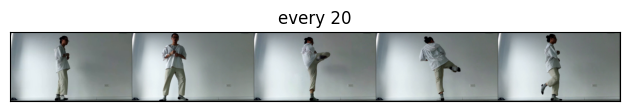

In [21]:
plot(every_twenty_frame, "every 20")